# Face Recognition

In [1]:
import conx as cx

Using TensorFlow backend.
ConX, version 3.7.5


In [2]:
faces = cx.Dataset.get('cmu_faces_half_size')

In [3]:
faces.info()

**Dataset**: CMU Faces, half-size


Original source: http://archive.ics.uci.edu/ml/datasets/cmu+face+images

**Information**:
   * name    : CMU Faces, half-size
   * length  : 624

**Input Summary**:
   * shape  : (60, 64)
   * range  : (0.0, 1.0)

**Target Summary**:
   * shape  : (4,)
   * range  : (0, 1)



In [4]:
faces.summary()

_________________________________________________________________
CMU Faces, half-size:
Patterns    Shape                 Range                         
inputs      (60, 64)              (0.0, 1.0)                    
targets     (4,)                  (0, 1)                        
Total patterns: 624
   Training patterns: 624
   Testing patterns: 0
_________________________________________________________________


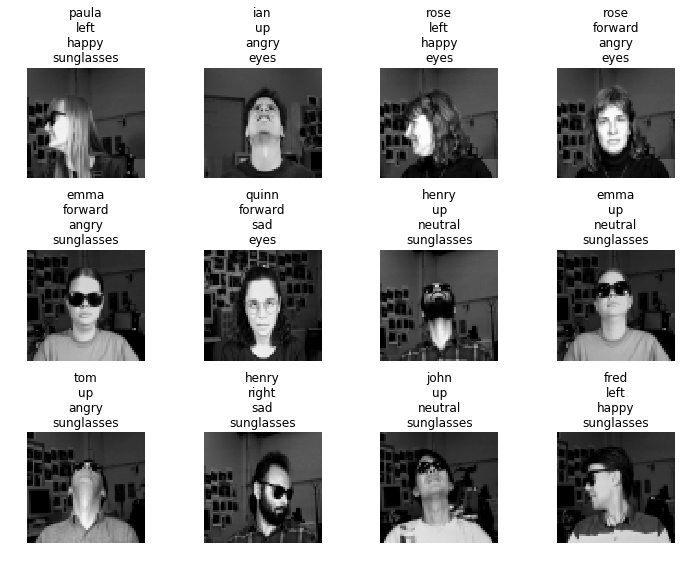

In [5]:
faces.shuffle()
cx.view(faces.inputs[0:12], 
        labels=[x.replace("_", "\n") for x in faces.labels[0:12]], 
        layout=(3,4), 
        spacing=0.50,
        scale=3)

In [6]:
set([label.split("_")[0] for label in faces.labels])

{'alex',
 'bob',
 'carl',
 'dave',
 'emma',
 'fred',
 'george',
 'henry',
 'ian',
 'john',
 'keith',
 'larry',
 'mike',
 'neil',
 'owen',
 'paula',
 'quinn',
 'rose',
 'sam',
 'tom'}

In [7]:
set([label.split("_")[1] for label in faces.labels])

{'forward', 'left', 'right', 'up'}

In [8]:
set([label.split("_")[2] for label in faces.labels])

{'angry', 'happy', 'neutral', 'sad'}

In [9]:
set([label.split("_")[3] for label in faces.labels])

{'eyes', 'sunglasses'}

In [10]:
faces.labels.select(lambda i, dataset: dataset.labels[i].split("_")[3] == "sunglasse", index=True)

[]

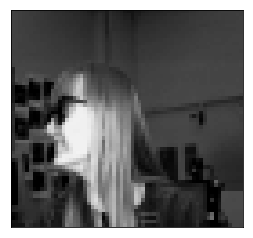

In [11]:
cx.view(faces.inputs[0])

In [12]:
faces.targets[0]

[1, 0, 0, 0]

In [13]:
cx.shape(faces.inputs[0])

(60, 64)

In [14]:
net = cx.Network("Pose Recognizer")

net.add(cx.Layer('input', cx.shape(faces.inputs[0])),
        cx.FlattenLayer("flatten"),
        cx.Layer('hidden', 3, activation='sigmoid'),
        cx.Layer('output', 4, activation='sigmoid'))

net.connect()

net.compile(loss='mean_squared_error', optimizer="SGD", lr=0.2, momentum=0.1)

In [15]:
net.set_dataset(faces)
faces.split(0.30)  # reserve 30% of input data for testing set
faces.summary()

_________________________________________________________________
CMU Faces, half-size:
Patterns    Shape                 Range                         
inputs      (60, 64)              (0.0, 1.0)                    
targets     (4,)                  (0, 1)                        
Total patterns: 624
   Training patterns: 437
   Testing patterns: 187
_________________________________________________________________


In [16]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 60, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 11523     
_________________________________________________________________
output (Dense)               (None, 4)                 16        
Total params: 11,539
Trainable params: 11,539
Non-trainable params: 0
_________________________________________________________________


In [17]:
net.propagate(faces.inputs[3])

[0.4140169620513916,
 0.5658414363861084,
 0.49322348833084106,
 0.38074418902397156]

In [18]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', options=(…

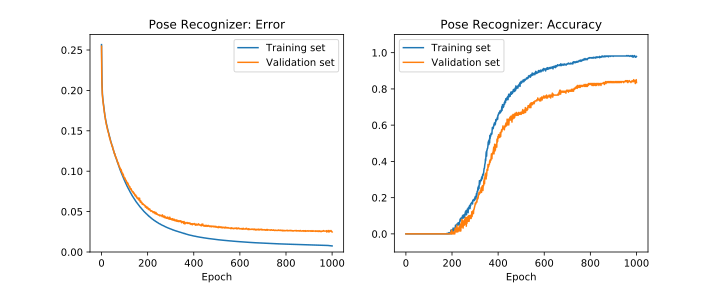

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
# 1000 |   0.00750 |   0.97936 |   0.02478 |   0.83511 


In [12]:
net.train(1000, accuracy=1.0, tolerance=0.2, report_rate=5)

In [13]:
net.evaluate()

{'acc': 0.9816933638443935,
 'loss': 0.007463851087946163,
 'val_acc': 0.8342245976555156,
 'val_loss': 0.024856202264520573}

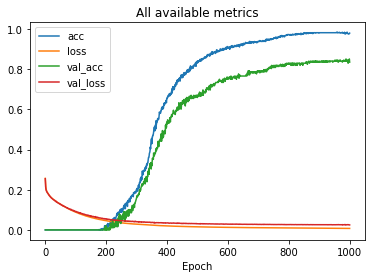

In [14]:
net.plot("all", title="All available metrics")

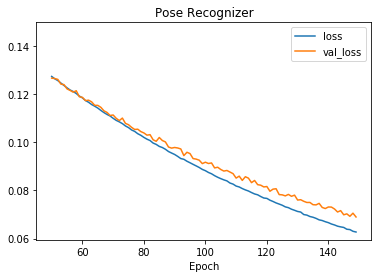

In [15]:
net.plot(['loss', 'val_loss'], ymax=0.15, start=50, end=150)

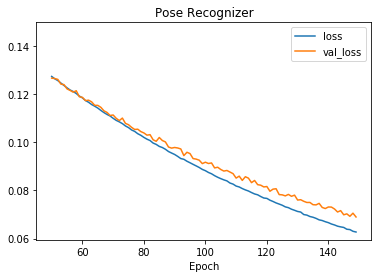

In [16]:
net.plot(['.*loss'], ymax=0.15, start=50, end=150)

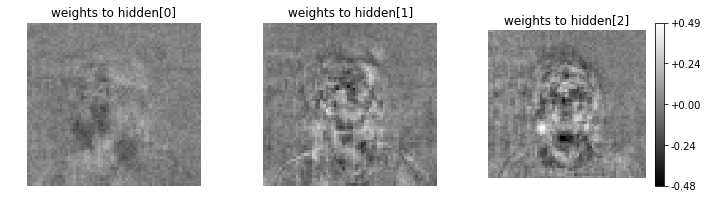

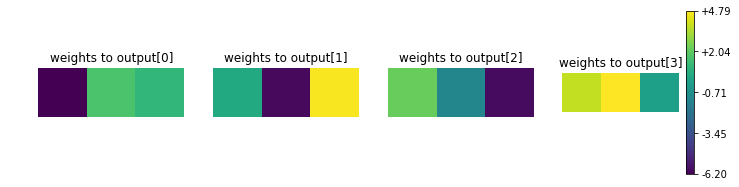

In [17]:
net.plot_layer_weights('hidden', vshape=faces.inputs.shape[0])
net.plot_layer_weights('output', colormap='viridis')

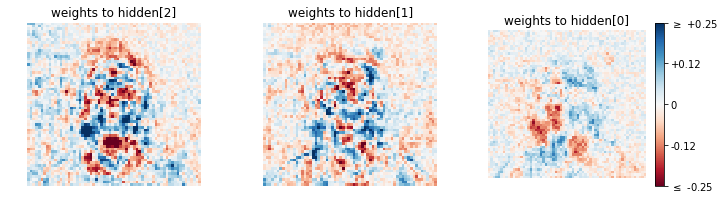

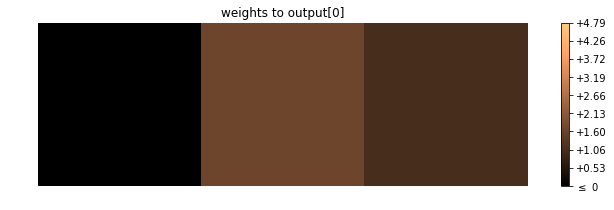

In [18]:
# colorbar colors or values can be easily changed
net.plot_layer_weights('hidden', vshape=net.dataset.inputs.shape[0], 
                       units=(2,1,0), colormap="RdBu", wrange=(-0.25, 0.25))
net.plot_layer_weights('output', units=0, wmin=0, colormap="copper", ticks=10)

In [19]:
net.show_unit_weights('output', 0)

-6.20  1.68  1.09 


In [20]:
net.get_weights("output")

[[[-6.198843479156494,
   0.48533692955970764,
   2.2441534996032715,
   3.789884567260742],
  [1.6767936944961548,
   -5.901026248931885,
   -1.1506351232528687,
   4.787131309509277],
  [1.0861774682998657,
   4.698576927185059,
   -5.883935928344727,
   -0.006406568922102451]],
 [0.4804971516132355,
  -2.6081082820892334,
  0.9343416690826416,
  -6.336297988891602]]

In [22]:
faces.labels[:10]

['neil_right_neutral_sunglasses',
 'paula_left_angry_eyes',
 'bob_up_neutral_sunglasses',
 'tom_forward_happy_eyes',
 'owen_forward_neutral_sunglasses',
 'tom_left_angry_eyes',
 'bob_left_angry_sunglasses',
 'paula_up_sad_sunglasses',
 'alex_up_angry_sunglasses',
 'quinn_forward_angry_eyes']